# Laptop Price Prediction

## Assignment
Your task is to define and train a machine learning model for predicting the price of a laptop (`buynow_price` column in the dataset) based on its attributes. When testing and comparing your models, aim to minimize the `RMSE` measure.

## Data Description
The dataset has already been randomly divided into the training, validation and test sets. It is stored in 3 files: `train_dataset.json, val_dataset.json and test_dataset.json` respectively. Each file is JSON saved in `orient=’columns’` format.

Example how to load the data:

```python
import pandas as pd
dataset = pd.read_json("public-dataset.json")
dataset.columns
Index(['buynow_price', 'graphic card type', 'communications', 'resolution (px)', 'CPU cores', 'RAM size', 'operating system', 'drive type', 'input devices', 'multimedia', 'RAM type', 'CPU clock speed (GHz)', 'CPU model', 'state', 'drive memory size (GB)', 'warranty', 'screen size'], dtype='object')
```

# Solution

## Data Loading

In [3]:
import pandas as pd
import numpy as np

In [145]:
train_df = pd.read_json('datasets/train_dataset.json', orient='columns')
val_df = pd.read_json('datasets/val_dataset.json', orient='columns')
test_df = pd.read_json('datasets/test_dataset.json', orient='columns')

In [146]:
df = pd.concat([train_df, val_df, test_df], axis=0)
df.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
10303,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,2,8 gb,[windows 10 home],hdd,None,[SD card reader],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0
10423,None,None,None,2,None,None,None,None,None,None,NaN,None,new,NaN,producer warranty,None,1599.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0


In [147]:
df.dtypes

graphic card type          object
communications             object
resolution (px)            object
CPU cores                  object
RAM size                   object
operating system           object
drive type                 object
input devices              object
multimedia                 object
RAM type                   object
CPU clock speed (GHz)     float64
CPU model                  object
state                      object
drive memory size (GB)    float64
warranty                   object
screen size                object
buynow_price              float64
dtype: object

In [148]:
df.shape

(7853, 17)

## Data Exploration & Preprocessing

In [149]:
# feature wise unique value exploration
for col in df.columns.to_list():
    if type(df[col][0]) != list:
        print(f"Unique values {col}: {df[col].unique()}")
        print("--------------------------------------------------")
        print()

Unique values graphic card type: ['dedicated graphics' None 'integrated graphics']
--------------------------------------------------

Unique values resolution (px): ['1920 x 1080' '1366 x 768' None '2560 x 1440' '1600 x 900' '3840 x 2160'
 'other' '1920 x 1280' '1280 x 800' '3200 x 1800' '2880 x 1620'
 '2160 x 1440' '1920 x 1200' '2560 x 1600']
--------------------------------------------------

Unique values CPU cores: ['4' '2' 'not applicable' '3' '1' '8' '6']
--------------------------------------------------

Unique values RAM size: ['32 gb' '8 gb' None '12 gb' '4 gb' '16 gb' '2 gb' '20 gb' '6 gb' '64 gb'
 '256 mb' '24 gb']
--------------------------------------------------

Unique values drive type: ['ssd + hdd' 'ssd' 'hdd' None 'emmc' 'hybrid']
--------------------------------------------------

Unique values RAM type: ['ddr4' 'ddr3' None 'ddr3l']
--------------------------------------------------

Unique values CPU clock speed (GHz): [2.6  2.4  1.6   nan 1.2  2.   2.5  2.8  1.9

In [150]:
df.columns.to_list()

['graphic card type',
 'communications',
 'resolution (px)',
 'CPU cores',
 'RAM size',
 'operating system',
 'drive type',
 'input devices',
 'multimedia',
 'RAM type',
 'CPU clock speed (GHz)',
 'CPU model',
 'state',
 'drive memory size (GB)',
 'warranty',
 'screen size',
 'buynow_price']

In [151]:
# 'state' column only a single value 'New' will not effect in developing a ML model
# drop state column
df = df.drop(columns='state')
df = df.dropna()
df.columns

Index(['graphic card type', 'communications', 'resolution (px)', 'CPU cores',
       'RAM size', 'operating system', 'drive type', 'input devices',
       'multimedia', 'RAM type', 'CPU clock speed (GHz)', 'CPU model',
       'drive memory size (GB)', 'warranty', 'screen size', 'buynow_price'],
      dtype='object')

In [152]:
compact_cols = ['communications', 'input devices', 'multimedia']

In [153]:
df[compact_cols]

,communications,input devices,multimedia
7233,"[bluetooth, lan 10/100/1000 mbps]","[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]"
5845,"[wi-fi, bluetooth, lan 10/100 mbps]","[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]"
5897,"[wi-fi, bluetooth]","[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]"
4870,"[wi-fi, bluetooth, lan 10/100 mbps]","[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]"
2498,"[wi-fi, bluetooth, lan 10/100/1000 mbps]","[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]"
...,...,...,...
9211,"[wi-fi, bluetooth, lan 10/100/1000 mbps]","[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]"
2748,"[bluetooth, lan 10/100 mbps]","[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]"
2072,"[wi-fi, bluetooth, lan 10/100/1000 mbps]","[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]"
4741,"[bluetooth, lan 10/100 mbps]","[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]"


In [154]:
pd.DataFrame(df['input devices'].to_list()).sample(20)

,0,1,2,3
5114,keyboard,touchpad,illuminated keyboard,numeric keyboard
1500,keyboard,touchpad,numeric keyboard,None
5194,keyboard,touchpad,None,None
6064,keyboard,touchpad,numeric keyboard,None
2985,keyboard,touchpad,illuminated keyboard,None
4721,keyboard,touchpad,illuminated keyboard,None
71,keyboard,touchpad,None,None
5421,keyboard,touchpad,None,None
5458,keyboard,touchpad,numeric keyboard,None
143,keyboard,touchpad,numeric keyboard,None


In [155]:
df['communications'].to_list()

[['bluetooth', 'lan 10/100/1000 mbps'],
 ['wi-fi', 'bluetooth', 'lan 10/100 mbps'],
 ['wi-fi', 'bluetooth'],
 ['wi-fi', 'bluetooth', 'lan 10/100 mbps'],
 ['wi-fi', 'bluetooth', 'lan 10/100/1000 mbps'],
 ['wi-fi', 'bluetooth', 'lan 10/100/1000 mbps'],
 ['wi-fi 802.11 b/g/n/ac', 'bluetooth', 'lan 10/100/1000 mbps'],
 ['wi-fi', 'bluetooth'],
 ['wi-fi', 'bluetooth', 'lan 10/100/1000 mbps'],
 ['wi-fi', 'bluetooth', 'lan 10/100/1000 mbps'],
 ['bluetooth', 'lan 10/100 mbps'],
 ['wi-fi', 'bluetooth', 'lan 10/100/1000 mbps'],
 ['wi-fi', 'bluetooth', 'lan 10/100 mbps'],
 ['wi-fi', 'bluetooth', 'lan 10/100/1000 mbps'],
 ['wi-fi', 'bluetooth', 'lan 10/100/1000 mbps'],
 ['bluetooth', 'lan 10/100 mbps'],
 ['wi-fi', 'bluetooth', 'lan 10/100/1000 mbps'],
 ['wi-fi', 'bluetooth', 'lan 10/100/1000 mbps'],
 ['wi-fi', 'bluetooth', 'lan 10/100 mbps'],
 ['bluetooth',
  'lan 10/100/1000 mbps',
  'lan 10/100 mbps',
  'intel wireless display (widi)',
  'nfc (near field communication)',
  'modem 3g (wwan)'],
 ['

In [156]:
def get_unique_val(col_name):
    col_df = pd.DataFrame(df[col_name].to_list())
    unique_vals = list()
    
    for col in col_df.columns.to_list():
        unique_vals += [val for val in list(col_df[col].unique()) if (val not in unique_vals and val is not None)]
    
    return unique_vals

In [157]:
get_unique_val('input devices')
get_unique_val('multimedia')

['SD card reader', 'camera', 'microphone', 'speakers']

In [158]:
compact_dict = {"communications": get_unique_val('communications'),
 "input devices": get_unique_val('input devices'),
 "multimedia": get_unique_val('multimedia')}

In [159]:
compact_dict

{'communications': ['bluetooth',
  'wi-fi',
  'wi-fi 802.11 b/g/n/ac',
  'lan 10/100 mbps',
  'wi-fi 802.11 a/b/g/n/ac',
  'nfc (near field communication)',
  'lan 10/100/1000 mbps',
  'gps',
  'wi-fi 802.11 b/g/n',
  'intel wireless display (widi)',
  'wi-fi 802.11 a/b/g/n',
  'modem 3g (wwan)',
  'modem 4g (lte)'],
 'input devices': ['keyboard',
  'touchpad',
  'illuminated keyboard',
  'numeric keyboard'],
 'multimedia': ['SD card reader', 'camera', 'microphone', 'speakers']}

In [160]:
df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,"17"" - 17.9""",4999.00
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,"15"" - 15.9""",2649.00
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,"12"" - 12.9""",4499.00
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8 gb,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,"15"" - 15.9""",2099.00
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8 gb,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,"17"" - 17.9""",2699.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,500.0,producer warranty,"15"" - 15.9""",5599.00
2748,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1600 x 900,4,8 gb,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,1000.0,seller warranty,"17"" - 17.9""",2925.36
2072,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1120.0,producer warranty,"17"" - 17.9""",3799.00
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,1256.0,producer warranty,"15"" - 15.9""",5589.00


In [161]:
df['RAM size'] = df['RAM size'].str.replace(' gb', '', regex=True).astype('int32')
# df['RAM size'] = df['RAM size'].astype('int32')

In [163]:
df['screen size'] = df['screen size'].apply(lambda x:x.split('"')[0])
df.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.00
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,15,2649.00
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,12,4499.00
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,15,2099.00
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,17,2699.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,500.0,producer warranty,15,5599.00
2748,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1600 x 900,4,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,1000.0,seller warranty,17,2925.36
2072,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1120.0,producer warranty,17,3799.00
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,1256.0,producer warranty,15,5589.00


In [164]:
df['resolution_x'] = df['resolution (px)'].apply(lambda x: int(x.split(' x ')[0]))
df['resolution_y'] = df['resolution (px)'].apply(lambda x: int(x.split(' x ')[1]))
df.drop(columns='resolution (px)', inplace=True)

In [165]:
df.columns

Index(['graphic card type', 'communications', 'CPU cores', 'RAM size',
       'operating system', 'drive type', 'input devices', 'multimedia',
       'RAM type', 'CPU clock speed (GHz)', 'CPU model',
       'drive memory size (GB)', 'warranty', 'screen size', 'buynow_price',
       'resolution_x', 'resolution_y'],
      dtype='object')

In [166]:
df.head(1)

,graphic card type,communications,CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price,resolution_x,resolution_y
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.0,1920,1080


In [167]:
numerical_cols = [ 'CPU cores', 'RAM size', 'CPU clock speed (GHz)', 'drive memory size (GB)',
                     'screen size', 'resolution_x', 'resolution_y']
numerical_df = df[numerical_cols].astype(float)
numerical_df.head()

,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,resolution_y
7233,4.0,32.0,2.6,1250.0,17.0,1920.0,1080.0
5845,4.0,8.0,2.4,256.0,15.0,1366.0,768.0
5897,4.0,8.0,1.2,256.0,12.0,2560.0,1440.0
4870,2.0,8.0,2.0,1000.0,15.0,1366.0,768.0
2498,4.0,8.0,2.4,1000.0,17.0,1920.0,1080.0


### one hot encoding

In [198]:
dummies_df = df['operating system'].str.join('|').str.get_dummies()

In [193]:
df.head(5)

,graphic card type,communications,CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price,resolution_x,resolution_y
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.0,1920,1080
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,15,2649.0,1366,768
5897,integrated graphics,"[wi-fi, bluetooth]",4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,12,4499.0,2560,1440
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,15,2099.0,1366,768
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,17,2699.0,1920,1080


In [199]:
dummy_cols = ['drive type', 'RAM type', 'CPU model']
for col in dummy_cols:
    col_dummies_df = df[col].str.get_dummies()  
    dummies_df = pd.concat([dummies_df, col_dummies_df], axis=1)

dummies_df

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5845,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5897,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4870,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2498,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2748,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2072,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4741,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [202]:
# check remaining columns
label_col = ['buynow_price']
categorical_columns = [col for col in df.columns.to_list() if col not in compact_cols + label_col + numerical_cols + ['operating system'] + dummy_cols]
categorical_columns

['graphic card type', 'warranty']

In [203]:
# encode them
categorical_df = pd.get_dummies(df[categorical_columns])
categorical_df

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty
7233,1,0,1,0
5845,1,0,0,1
5897,0,1,1,0
4870,0,1,1,0
2498,1,0,1,0
...,...,...,...,...
9211,1,0,1,0
2748,1,0,0,1
2072,1,0,1,0
4741,1,0,1,0


In [204]:
# put unique_vals to compact_df columns
unique_cols = list()
for col in compact_cols:
    unique_cols += compact_dict[col]
compact_df = pd.DataFrame(columns = unique_cols , index=df.index, data=np.zeros((df.shape[0], len(unique_cols))))
compact_df   

,bluetooth,wi-fi,wi-fi 802.11 b/g/n/ac,lan 10/100 mbps,wi-fi 802.11 a/b/g/n/ac,nfc (near field communication),lan 10/100/1000 mbps,gps,wi-fi 802.11 b/g/n,intel wireless display (widi),...,modem 3g (wwan),modem 4g (lte),keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,microphone,speakers
7233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
# get the values of compact_df from original dataframe
# If the computer includes the column name as a feature assign 1, otherwise 0
for col, unique_list in compact_dict.items():
    for unique in unique_list:
        compact_df[unique] = df[col].apply(lambda x: 1 if unique in x else 0)

compact_df

,bluetooth,wi-fi,wi-fi 802.11 b/g/n/ac,lan 10/100 mbps,wi-fi 802.11 a/b/g/n/ac,nfc (near field communication),lan 10/100/1000 mbps,gps,wi-fi 802.11 b/g/n,intel wireless display (widi),...,modem 3g (wwan),modem 4g (lte),keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,microphone,speakers
7233,1,0,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
5845,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
5897,1,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1
4870,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
2498,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
2748,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
2072,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
4741,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1


In [206]:
# concatenate all processed dataframe to put together
new_df = pd.concat([categorical_df, numerical_df, compact_df, dummies_df],axis=1)
new_df.head(5)

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,1,0,1,0,4.0,32.0,2.6,1250.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0
5845,1,0,0,1,4.0,8.0,2.4,256.0,15.0,1366.0,...,0,0,0,0,0,1,0,0,0,0
5897,0,1,1,0,4.0,8.0,1.2,256.0,12.0,2560.0,...,0,0,0,0,0,0,0,0,0,1
4870,0,1,1,0,2.0,8.0,2.0,1000.0,15.0,1366.0,...,0,0,0,1,0,0,0,0,0,0
2498,1,0,1,0,4.0,8.0,2.4,1000.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0


In [236]:
new_df.shape

(6109, 68)

## Multicollinearity Check
Multicollinearity is a potential problem for this regression task. We will check it through `Variance Inflation Factor (VIF)`. We will eliminate all features that have `VIF` score above 20. For each iteration, we will drop only one feature, since when the feature set is changed `VIF` scores also change.



In [210]:
import warnings
warnings.filterwarnings('ignore')

In [211]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [208]:
# compute VIF score with variance_inflation_factor() function
def compute_vif(features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(new_df[features].values, i) for i in range(len(features))]
    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

In [215]:
%timeit
# apply VIF computation to all columns
features = new_df.columns.to_list()
vif_data = compute_vif(features)
vif_data

,feature,VIF
0,windows 7 home 64-bit,1.027793
1,windows 8.1 professional 32-bit,1.032288
2,windows 7 professional 32-bit,1.038891
3,wi-fi 802.11 a/b/g/n,1.074400
4,wi-fi 802.11 a/b/g/n/ac,1.120884
...,...,...
63,warranty_seller warranty,inf
64,warranty_producer warranty,inf
65,graphic card type_integrated graphics,inf
66,amd a12,inf


In [216]:
# drop with highest vif score until all vif scores are under 20
multicollinearity = True

while multicollinearity:
    highest_vif_feature = vif_data['feature'].values.tolist()[-1]
    print("I will remove: ", highest_vif_feature)
    features.remove(highest_vif_feature)
    vif_data = compute_vif(features)
    multicollinearity = False if len(vif_data[vif_data.VIF > 20]) == 0 else True

selected_features = vif_data['feature'].values.tolist()
vif_data

I will remove other CPU
I will remove graphic card type_dedicated graphics
I will remove ssd
I will remove ddr3
I will remove warranty_producer warranty
I will remove resolution_x
I will remove touchpad
I will remove screen size
I will remove camera
I will remove CPU clock speed (GHz)
I will remove windows 10 home
I will remove keyboard
I will remove intel core i7
I will remove bluetooth
I will remove CPU cores
I will remove microphone


,feature,VIF
0,windows 8.1 professional 32-bit,1.004397
1,windows 7 home 64-bit,1.007451
2,intel celeron m,1.019598
3,windows 7 professional 32-bit,1.022183
4,windows 8.1 home 32-bit,1.028446
5,intel core m,1.030207
6,amd a4,1.036642
7,amd e1,1.043705
8,amd a10,1.046219
9,amd a12,1.069440


In [217]:
import seaborn as sns
from matplotlib import pyplot as plt

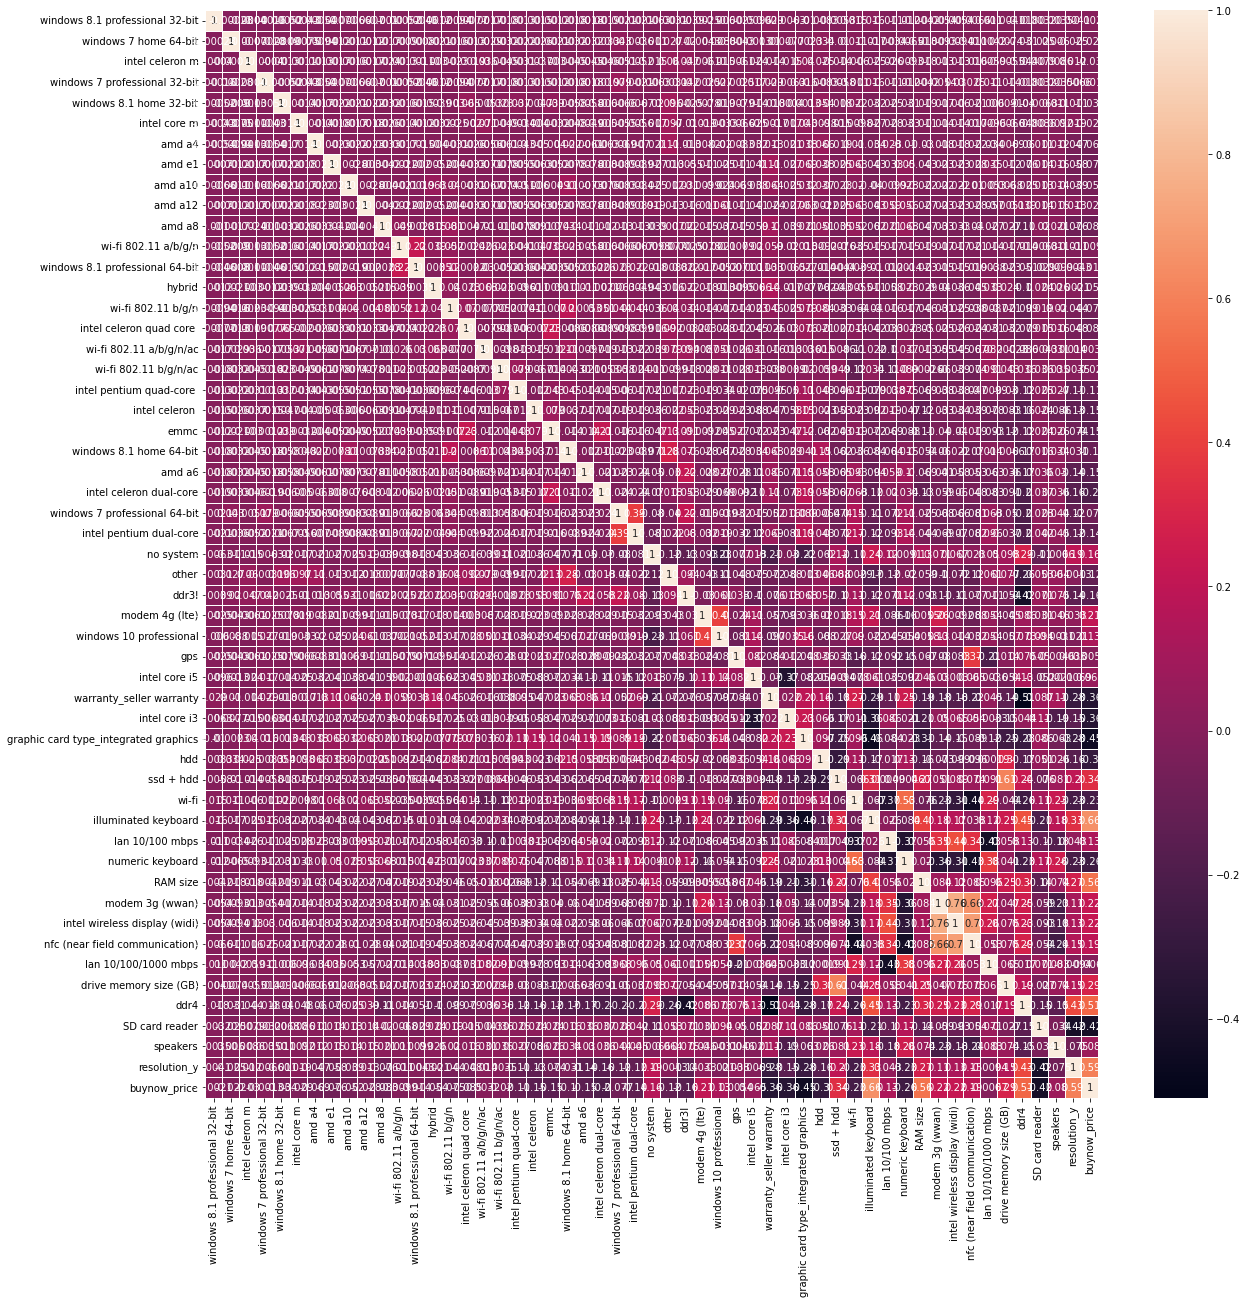

In [218]:
# correlation matrix of multicollinearity free dataset
plt.figure(figsize=(20, 20)) # width and height in inches
corr_df = pd.concat([new_df[selected_features], df[label_col]], axis=1)
sns.heatmap(corr_df.corr(),annot=True, lw=1)
plt.show()

## Train/Val/Test Split


In [219]:
# use the indeces of given datasets to properly separate it again as initial datasets
train_indeces = train_df.dropna().index
val_indeces = val_df.dropna().index
test_indeces = test_df.dropna().index

In [220]:
train_df = new_df.loc[train_indeces]
val_df = new_df.loc[val_indeces]
test_df = new_df.loc[test_indeces]

In [221]:
# sklearn machine learning models expect y_train, y_test, y_val 
# in the shape as (row_number, ) instead of (row_number, 1) shape, so apply .ravel()
X_train, X_val, X_test = train_df[selected_features].to_numpy(), val_df[selected_features].to_numpy(), test_df[selected_features].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()

In [223]:
X_train.shape

(3694, 52)

In [224]:
y_train.shape

(3694,)

## Classical Machine Learning
We will implement and try different machine learning models from Linear Regression to Ensemble Methods. We will measure root-mean-squared-error as instructed. We will scale our data with `MaxAbsScaler()` from sklearn, which works well with sparse datasets.

In [237]:
train_df

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,1,0,1,0,4.0,32.0,2.60,1250.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0
5845,1,0,0,1,4.0,8.0,2.40,256.0,15.0,1366.0,...,0,0,0,0,0,1,0,0,0,0
5897,0,1,1,0,4.0,8.0,1.20,256.0,12.0,2560.0,...,0,0,0,0,0,0,0,0,0,1
4870,0,1,1,0,2.0,8.0,2.00,1000.0,15.0,1366.0,...,0,0,0,1,0,0,0,0,0,0
2498,1,0,1,0,4.0,8.0,2.40,1000.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,0,1,0,1,4.0,6.0,1.80,256.0,15.0,1366.0,...,0,0,0,0,0,0,0,0,0,0
4816,0,1,1,0,2.0,8.0,2.00,480.0,15.0,1920.0,...,0,0,0,1,0,0,0,0,0,0
11249,0,1,0,1,2.0,4.0,1.70,500.0,12.0,1920.0,...,0,0,0,1,0,0,0,0,0,0
685,0,1,1,0,4.0,4.0,1.86,1000.0,17.0,1600.0,...,0,0,1,0,0,0,0,0,0,0


In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

Linear : 61584275445745.68
MLP : 719.6561002119159
DecisionTree : 656.6811883268169
RandomForest : 557.0123635130183
GradientBoosting : 526.9818640941238
ExtraTrees : 577.5740215020353


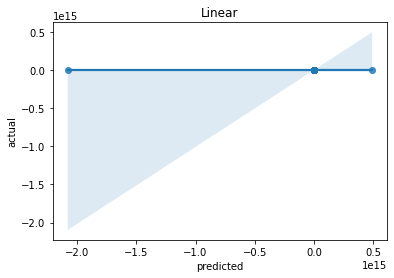

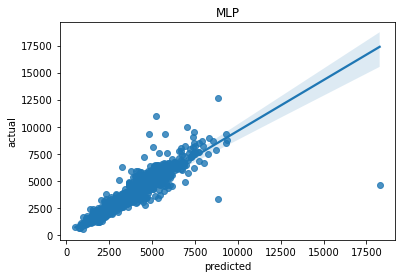

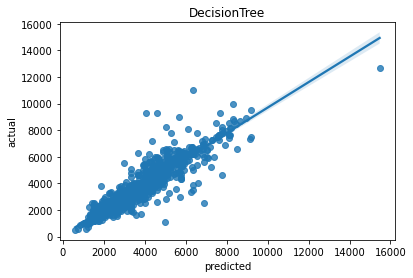

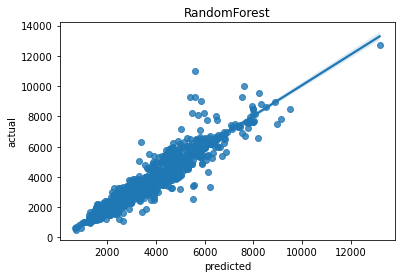

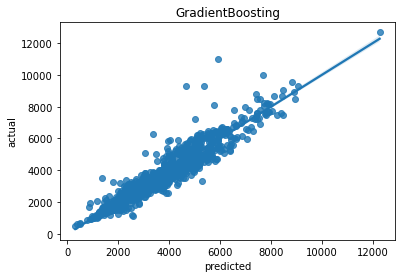

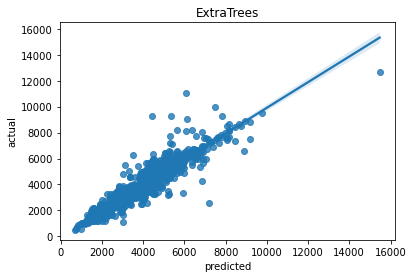

In [226]:
def rmse(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=False)


def regression(regressor_name, regressor):
#     alternative scaler 
#     pipe = make_pipeline(StandardScaler(), regressor)
    pipe = make_pipeline(MaxAbsScaler(), regressor)
    pipe.fit(X_train, y_train) 
    predicted = pipe.predict(X_test)
    rmse_val = rmse(y_test, predicted)
    print(regressor_name, ':', rmse_val)
    pred_df[regressor_name+'_Pred'] = predicted
    plt.figure(regressor_name)
    plt.title(regressor_name)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    sns.regplot(y=y_test,x=predicted)
    
regressors = {
    'Linear' : LinearRegression(),
    'MLP': MLPRegressor(random_state=42, max_iter=500, learning_rate="constant", learning_rate_init=0.6),
    'DecisionTree': DecisionTreeRegressor(max_depth=15, random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42, criterion='squared_error',
                                                  loss='squared_error',learning_rate=0.6, warm_start=True),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=100, random_state=42),
}

pred_df = pd.DataFrame(columns =["Actual"])
pred_df["Actual"] = y_test

for key in regressors.keys():
    regression(key, regressors[key])

Voting : 504.99219187047


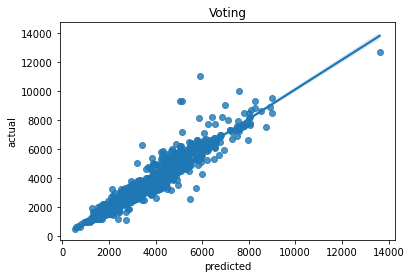

In [227]:
from sklearn.ensemble import VotingRegressor

# classifiers
reg1 = regressors["GradientBoosting"]
reg2 = regressors["ExtraTrees"]
reg3 = regressors["RandomForest"]

# take the highest performed three models and combine them in a voting mechanism
# assign weights to their predictions and create new regressor
# it is possible to try with different weights 
regression("Voting", VotingRegressor([("gb", reg1), ("et", reg2), ("rf", reg3)], weights=[0.4, 0.35, 0.25]))

In [228]:
pred_df

,Actual,Linear_Pred,MLP_Pred,DecisionTree_Pred,RandomForest_Pred,GradientBoosting_Pred,ExtraTrees_Pred,Voting_Pred
0,2369.00,2525.778810,2281.069884,2369.000000,2314.900000,2476.255231,2369.000,2398.377092
1,2299.00,2445.744551,2308.562792,2395.666667,2294.250000,2252.793867,2299.000,2279.330047
2,5999.00,5052.663602,5132.973968,5063.285714,5003.982143,5103.177670,4999.000,5041.916604
3,1299.00,1172.701945,1288.382241,1325.615385,1263.420040,1254.143349,1261.500,1259.037350
4,3329.00,5921.383590,8828.099076,6274.000000,6224.232042,5281.607409,5908.600,5736.710974
...,...,...,...,...,...,...,...,...
1195,5599.00,5739.624487,5631.699560,5809.000000,5679.553571,5979.668993,5674.000,5797.655990
1196,2925.36,3037.435711,2735.188007,2755.001500,2895.425300,2794.022506,2879.000,2849.115327
1197,3799.00,4206.546431,4208.209337,4357.400000,4523.864381,4131.571809,4215.900,4259.159819
1198,5589.00,5040.406345,4914.287883,4872.000000,4913.655000,5201.863482,4471.535,4874.196393


It improves the performance of the RandomForest. We can go ahead with this voting model as our official solution.

## Feature Selection
Feature selection hurts the performance of this task. However, it is always best to present all the methods applied through the assignment. Hence, we are representing it also. We used `f_regression` and `RandomForestRegressor.modelimportances` to check feature importance. We decided on `k=25`, but you can change and see the results for different k values.

In [229]:
from sklearn.feature_selection import SelectKBest, f_regression
#Select top 25 features based on f-regression
selector = SelectKBest(f_regression, k =25)
X = new_df[selected_features].to_numpy()
y = df[label_col].to_numpy().ravel()
selector.fit(X, y)
cols = new_df[selected_features].columns[selector.get_support()].to_list()
cols

['intel celeron ',
 'emmc',
 'amd a6',
 'intel celeron dual-core',
 'intel pentium dual-core',
 'no system',
 'ddr3l',
 'modem 4g (lte)',
 'warranty_seller warranty',
 'intel core i3',
 'graphic card type_integrated graphics',
 'hdd',
 'ssd + hdd',
 'wi-fi',
 'illuminated keyboard',
 'lan 10/100 mbps',
 'numeric keyboard',
 'RAM size',
 'modem 3g (wwan)',
 'intel wireless display (widi)',
 'nfc (near field communication)',
 'drive memory size (GB)',
 'ddr4',
 'SD card reader',
 'resolution_y']

In [230]:
X_train, X_val, X_test = train_df[cols].to_numpy(), val_df[cols].to_numpy(), test_df[cols].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()

RandomForest : 689.5841293235402


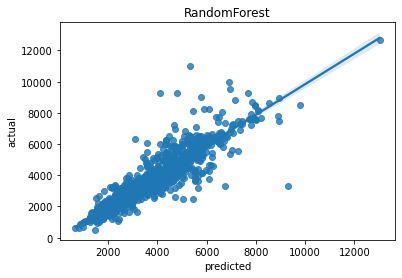

In [231]:
regression('RandomForest', regressors['RandomForest'])

Feature: windows 8.1 professional 32-bit , Score: 4.973371134104074e-06
Feature: windows 7 home 64-bit , Score: 0.0
Feature: intel celeron m , Score: 3.943939831647907e-05
Feature: windows 7 professional 32-bit , Score: 0.0
Feature: windows 8.1 home 32-bit , Score: 5.0467194254702984e-05
Feature: intel core m , Score: 0.00020479544394336958
Feature: amd a4 , Score: 0.00023012608983633226
Feature: amd e1 , Score: 7.565799456190145e-05
Feature: amd a10 , Score: 0.00019426092177305207
Feature: amd a12 , Score: 0.00024066812922089715
Feature: amd a8 , Score: 0.00017034014453873547
Feature: wi-fi 802.11 a/b/g/n , Score: 0.00022288687987535765
Feature: windows 8.1 professional 64-bit , Score: 0.001235310470718396
Feature: hybrid , Score: 0.000499177576732892
Feature: wi-fi 802.11 b/g/n , Score: 0.0001526397408483957
Feature: intel celeron quad core  , Score: 7.357701733413615e-05
Feature: wi-fi 802.11 a/b/g/n/ac , Score: 0.001067458351317804
Feature: wi-fi 802.11 b/g/n/ac , Score: 0.00059604

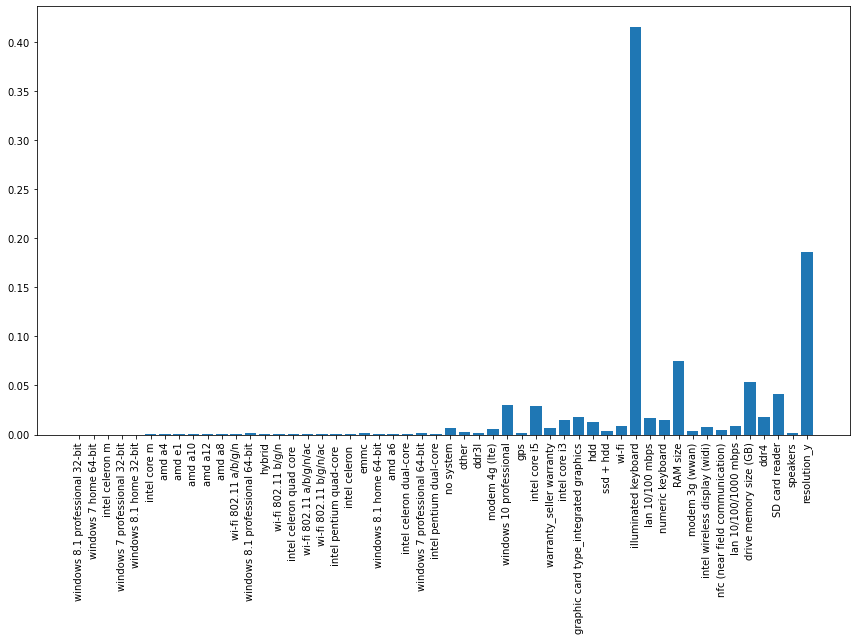

In [232]:
X = new_df[selected_features].values
X_train, X_val, X_test = train_df[selected_features].to_numpy(), val_df[selected_features].to_numpy(), test_df[selected_features].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()
model = RandomForestRegressor(random_state=42)
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(f"Feature: {selected_features[i]} , Score: {v}")
# plot feature importance
plt.figure(figsize=(12, 9)) # width and height in inches
plt.bar(selected_features, importance)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [233]:
feats_w_highest_importance = np.array(selected_features)[importance > 0.02].tolist()
feats_w_highest_importance

['windows 10 professional',
 'intel core i5',
 'illuminated keyboard',
 'RAM size',
 'drive memory size (GB)',
 'SD card reader',
 'resolution_y']

In [234]:
X_train, X_val, X_test = train_df[feats_w_highest_importance].to_numpy(), val_df[feats_w_highest_importance].to_numpy(), test_df[feats_w_highest_importance].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()

RandomForest : 712.3894667966214


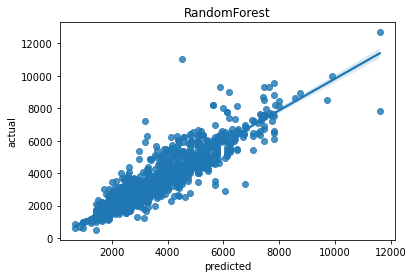

In [235]:
regression('RandomForest', regressors['RandomForest'])

> <b>Still, the complete feature set provides better results compared to features with the highest importance.</b>

## Assignment
- Implement GridSearch and Cross Validation for every regression model
- Use `X_val`, `y_val` for validation and on final tuned model check with `X_test`, `y_test`